In [128]:
import numpy as np
import scipy.special
import matplotlib.pyplot
%matplotlib inline

In [129]:
class NeuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        # creating weights
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

        self.lr = learningrate

        self.activation_function = lambda x: scipy.special.expit(x)
        
    
    def query(self, input_list):
        # convert input list to 2d array
        inputs = np.array(input_list, ndmin=2).T  # Bogdan Clarify why we need to do it
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # caclucate signals into output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs

    def train(self, input_list, targets_list):
        # convert inputs to 2d array
        inputs = np.array(input_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate signals of outputs
        final_outputs = self.activation_function(final_inputs)
        
        # calculating errors (target - actual)
        output_errors = targets - final_outputs
        hidden_errors = np.dot(self.who.T, output_errors)
        
        # update the weights for the links between hidden and output layers
        self.who += self.lr * np.dot((output_errors * final_outputs * (1 - final_outputs)), np.transpose(hidden_outputs))
        
        # update the weights between input and hidden layers
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1 - hidden_outputs)), np.transpose(inputs))
        
        pass

In [130]:
input_nodes = 784 # Because we have picture 28x28 pixels
hidden_nodes = 100 # We can think of this number as representation of features that correspond to 
# picture of number. The more hidden_nodes more features our NN can see. If we choose smaller "hidden_nodes"
# that some of features should be combined 
output_nodes = 10 # Because we have numbers from 0 to 9

learning_rate = 0.3

n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

with open('mnist_train_100.csv', 'r') as f:
# with open('mnist_train.csv', 'r') as f:
        training_data_list = f.readlines()
count = 1
for record in training_data_list:
    print(count)
    count+=1
    record = record.rstrip()
    all_values = record.split(',')
    # we need to scale inputs so, they would be small. 
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # now we need the targets. all_values[0] represents actual number
    targets = np.zeros(output_nodes) + 0.01 # created [0.01, 0.01... 0.01]
    # one of targets should correspond to our number. For example, if all_values[0]=='1',
    # then targets = [0.01, 0.99, 0.01 ... 0.01]
    targets[int(all_values[0])] = 0.99
    
    n.train(inputs, targets)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


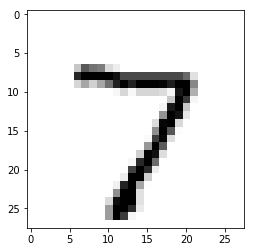

In [131]:
with open('mnist_test_10.csv', 'r') as f:
        test_data_list = f.readlines()
test_record = test_data_list[0].strip()
test_record = test_record.split(',')
image_array = np.asfarray(test_record[1:]).reshape(28, 28)
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [132]:
n.query((np.asfarray(test_record[1:]) / 255 * 0.99) + 0.01)

array([[ 0.08565772],
       [ 0.01626309],
       [ 0.01183086],
       [ 0.07980686],
       [ 0.04767266],
       [ 0.02849639],
       [ 0.00500518],
       [ 0.91136193],
       [ 0.06615202],
       [ 0.01525465]])

In [133]:
scorecard = []
for record in test_data_list:
    record = record.rstrip()
    all_values = record.split(',')
    correct_label = int(all_values[0])
    inputs = (np.asfarray(all_values[1:]) / 255 * 0.99) + 0.01
    outputs = n.query(inputs)
    label = np.argmax(outputs)
    if label == correct_label:
        scorecard.append(1)
    else: 
        scorecard.append(0)